In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

### 1. load data

In [2]:
#전체 dataframe / series를 생략 없이 보기 위해 사용
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}

data_dir = '/opt/ml/input/data'
data_path = os.path.join(data_dir, 'train_data.csv')
df = pd.read_csv(data_path, dtype= dtype, parse_dates=['Timestamp'])

CPU times: user 2.4 s, sys: 276 ms, total: 2.68 s
Wall time: 2.68 s


In [4]:
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userID            int16         
 1   assessmentItemID  object        
 2   testId            object        
 3   answerCode        int8          
 4   Timestamp         datetime64[ns]
 5   KnowledgeTag      int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 62.7+ MB


In [6]:
df.shape

(2266586, 6)

In [7]:
df.isnull().sum()

userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64

### 2. 각 feature 특징 살펴보기

In [8]:
df['userID'].nunique()

6698

총 7442개의 고유한 사용자가 존재하며, train data에서는 6698명이, test data에서는 744명이 존재한다.

In [9]:
#np.set_printoptions(threshold=np.inf)
df['userID'].unique()

array([   0,    1,    2,    5,    6,    7,    8,    9,   10,   11,   12,
         14,   15,   16,   18,   19,   20,   21,   22,   23,   24,   25,
         27,   28,   30,   31,   32,   33,   34,   35,   36,   37,   38,
         39,   40,   41,   42,   43,   44,   46,   47,   48,   49,   50,
         51,   52,   54,   55,   56,   57,   59,   60,   61,   62,   63,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         77,   78,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   95,   96,   97,   98,   99,  100,
        101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
        112,  113,  114,  115,  116,  117,  118,  119,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,
        146,  147,  148,  149,  150,  151,  152,  153,  154,  155,  156,
        157,  158,  160,  161,  162,  163,  164,  1

In [10]:
df['assessmentItemID'].nunique()

9454

In [11]:
df['testId'].nunique()

1537

In [12]:
#assessmentItemID의 맨 앞자리가 A로 시작하는지 확인
df['assessmentItemID'].apply(lambda x: x[0]).unique()

array(['A'], dtype=object)

In [13]:
#testID의 맨 앞자리가 A로 시작하는지 확인
df['testId'].apply(lambda x: x[0]).unique()

array(['A'], dtype=object)

In [14]:
#assessmentItemID가 testID에 맞게 잘 이루어져있는지 확인
(df['assessmentItemID'].apply(lambda x: x[1:7]) != df['testId'].apply(lambda x: x[1:4] + x[7:])).sum()

0

In [15]:
#testID의 4~6번째 자리가 '000'인지 확인
df['testId'].apply(lambda x: x[4:7]).unique()

array(['000'], dtype=object)

In [16]:
#전체 정답률 분포 확인
df['answerCode'].value_counts()

answerCode
1    1483205
0     783381
Name: count, dtype: int64

In [17]:
#정답 비율 확인
l = len(df['answerCode'])
answer_per = df['answerCode'].sum() / l * 100
print(f"{answer_per:.2f}%")

65.44%


In [18]:
df['KnowledgeTag'].nunique()

912

### 3. testID의 1~3번째 자리 testCode 분석

In [19]:
df['testCode'] = df['testId'].apply(lambda x : x[1:4])
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testCode
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,060
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,060
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,060
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,060
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,060


In [20]:
#testCode 1~9의 정수형 값으로 변환
df['testCode'] = df['testCode'].astype('int') //10

In [21]:
#각 testCode 별로 풀어진 횟수 count
df['testCode'].value_counts()

testCode
7    279164
5    275773
3    273762
1    272082
2    268327
4    267323
6    264434
8    246336
9    119385
Name: count, dtype: int64

대체적으로 골고루 풀어졌고 9번 코드의 경우만 적게 풀어진 것으로 확인됨.

In [22]:
df_copy = df.copy()
df_copy = df_copy.loc[ : , ['testCode', 'answerCode']]
df_copy

,testCode,answerCode
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1
...,...,...
2266581,3,0
2266582,4,1
2266583,4,1
2266584,4,1


In [23]:
#testCode와 answerCode 사이의 상관관계 비교
df_copy.corr()['testCode']['answerCode']

-0.20184053656373774

In [24]:
#정답률을 빠르게 구하기 위해 함수 정의
def percentile(s):
    return np.sum(s) / len(s)

In [25]:
#testCode 기준으로 groupby
code_groupby = df.groupby('testCode').agg({'answerCode' : percentile, 'assessmentItemID': 'nunique',
                                       'testId' : 'nunique', 'userID': 'nunique', 'KnowledgeTag' : 'nunique'})

code_groupby

,answerCode,assessmentItemID,testId,userID,KnowledgeTag
testCode,,,,,
1,0.800876,975,192,2074,64
2,0.737593,1022,194,2241,70
3,0.702238,1060,198,2444,85
4,0.684056,1031,198,2666,81
5,0.658208,1266,193,2321,98
6,0.709232,1213,186,2132,93
7,0.521876,1322,164,1686,176
8,0.502598,1050,138,1517,150
9,0.449948,515,74,671,96


In [26]:
code_groupby = code_groupby.reset_index()

[Text(0.5, 1.0, 'Answer Rate by Test Code')]

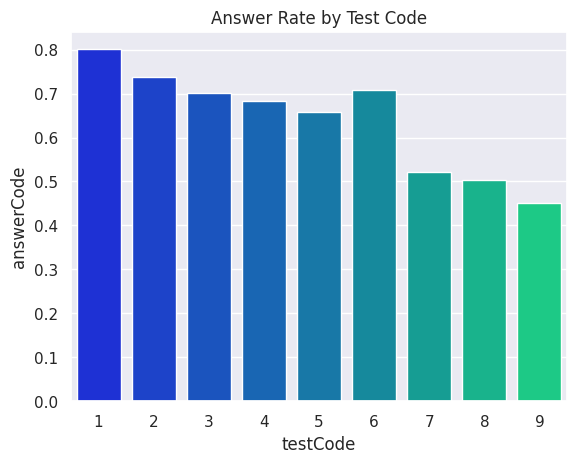

In [27]:
sns.barplot(x='testCode', y='answerCode', data=code_groupby, palette='winter').set(title='Answer Rate by Test Code')

비교적으로 testCode에 따라 선형적으로 정답률이 나왔다.  
이를 통해, testCode가 난이도를 의미할 수 있겠다는 가설을 설정할 수 있었다.  
다만, 6의 정답률이 높아지는 이유에 대해서 생각해봐야할 것 같다.  
(문제를 푼 시간 / tag / 학생에 영향을 받았을 수 있음 -> 상관관계 체크해보기)

[Text(0.5, 1.0, '# of Solved Problems by Test Code')]

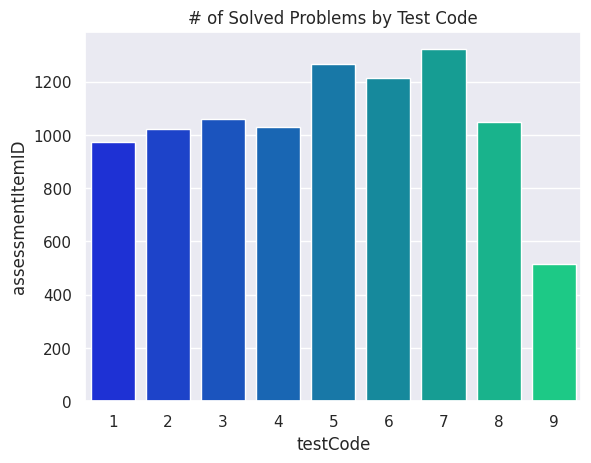

In [28]:
sns.barplot(x='testCode', y='assessmentItemID', data=code_groupby, palette='winter').set(title='# of Solved Problems by Test Code')

[Text(0.5, 1.0, '# of Solved Tests by Test Code')]

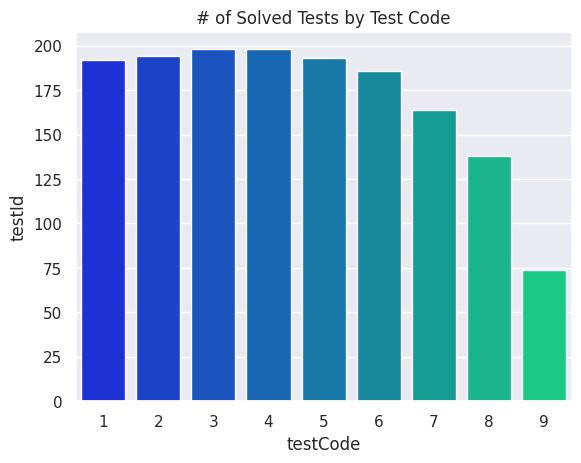

In [29]:
sns.barplot(x='testCode', y='testId', data=code_groupby, palette='winter').set(title='# of Solved Tests by Test Code')

난이도 5,6,7이 test 별 문항 숫자가 많은 것으로 추측해볼 수 있었다.

[Text(0.5, 1.0, '# of Users by Test Code')]

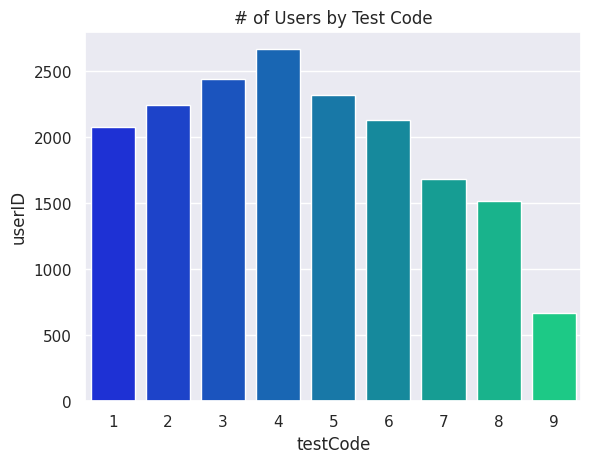

In [30]:
sns.barplot(x='testCode', y='userID', data=code_groupby, palette='winter').set(title='# of Users by Test Code')

[Text(0.5, 1.0, '# of KnowledgeTag by Test Code')]

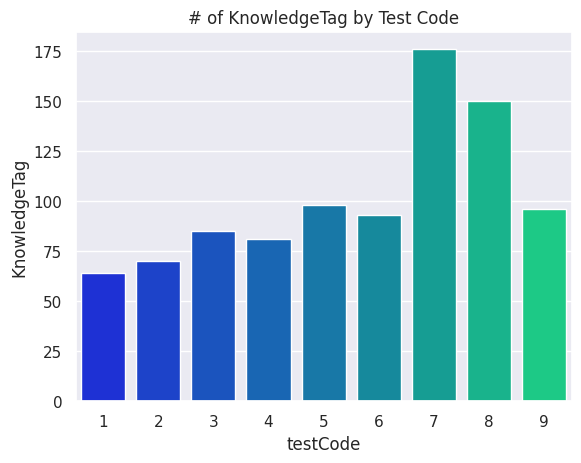

In [31]:
sns.barplot(x='testCode', y='KnowledgeTag', data=code_groupby, palette='winter').set(title='# of KnowledgeTag by Test Code')

testCode를 1~3, 4~6, 7~9로 분류하여 정답률 분석

In [32]:
def big_testcode_map(x:int) -> int:
    x = (x-1) // 3
    return x

In [33]:
df['bigtestCode'] = df['testCode'].apply(big_testcode_map)
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testCode,bigtestCode
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,1
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,1
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,1
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,1
...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,0
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,1
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,1


In [34]:
bigcode_groupby = df.groupby('bigtestCode').agg({'answerCode' : percentile, 'assessmentItemID': 'nunique'})

bigcode_groupby

,answerCode,assessmentItemID
bigtestCode,,
0,0.746853,3057
1,0.683473,3510
2,0.501196,2887


In [35]:
bigcode_groupby = bigcode_groupby.reset_index()

[Text(0.5, 1.0, 'Answer Rate by Test Code')]

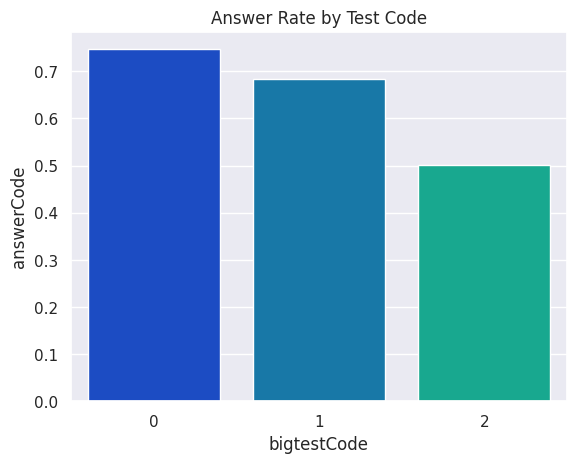

In [36]:
sns.barplot(x='bigtestCode', y='answerCode', data=bigcode_groupby, palette='winter').set(title='Answer Rate by Test Code')

### 4. KnowledgeTag 분석

In [37]:
df['KnowledgeTag'].sort_values().unique()

array([   23,    24,    25,    26,    30,    31,    32,    78,   116,
         117,   121,   162,   163,   164,   169,   192,   202,   307,
         308,   309,   331,   332,   334,   339,   342,   346,   351,
         355,   360,   363,   365,   371,   373,   374,   392,   393,
         394,   395,   396,   397,   398,   405,   407,   409,   411,
         417,   419,   425,   426,   427,   428,   429,   431,   433,
         434,   435,   436,   437,   438,   439,   440,   441,   443,
         444,   445,   446,   447,   448,   449,   451,   452,   454,
         455,   456,   457,   458,   459,   461,   464,   465,   471,
         475,   481,   547,   551,   554,   559,   574,   586,   587,
         588,   589,   590,   592,   593,   594,   595,   596,   598,
         599,   600,   601,   602,   603,   605,   606,   607,   608,
         609,   610,   611,   612,   614,   615,   616,   618,   623,
         624,   625,   626,   627,   628,   705,   706,   707,   708,
         709,   710,

In [38]:
#knowledgeTag를 크게 1000단위로 나눠서 분류 (숫자가 가까운 knowledgeTag는 비슷한 유형으로 가정됨)

def tag_map(x: int) -> int:
    x = int(x)
    x = x // 1000
    return x

In [39]:
df['KnowledgeTag_cat'] = df['KnowledgeTag'].apply(tag_map)

df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testCode,bigtestCode,KnowledgeTag_cat
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,1,7
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,1,7
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,1,7
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,1,7
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,1,7
...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3,0,0
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4,1,8
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4,1,8
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4,1,8


In [40]:
df['KnowledgeTag_cat'].nunique()

12

tag에 따른 정답률 분포

In [41]:
tag_groupby = df.groupby('KnowledgeTag_cat').agg({
    'userID': 'count',
    'answerCode': percentile
})
tag_groupby.describe()

,userID,answerCode
count,12.000000,12.000000
mean,188882.166667,0.632104
std,127333.668950,0.075845
min,15241.000000,0.467244
25%,103847.250000,0.610115
50%,145848.000000,0.645276
75%,250993.500000,0.669608
max,414688.000000,0.745753


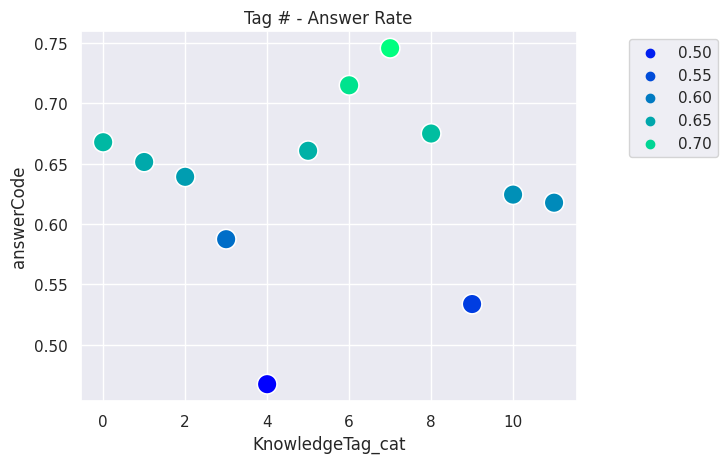

In [42]:
# tag에 대분류에 따른 정답률 그래프
g = sns.scatterplot(
    data=tag_groupby,
    x='KnowledgeTag_cat',
    y='answerCode',
    s = 200,
    hue = 'answerCode',
    palette = 'winter'
)
ax = plt.gca()
ax.set_title('Tag # - Answer Rate')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

특정 유형 (4)은 비교적 낮은 정답률을, 특정 유형(7)은 비교적 높은 정답률을 보이는 것으로 보여진다.
+ 미션에 나와 있는 자주 노출된 태그와 정답률 간의 상관관계를 반영하여 비교해 볼 필요가 있다.

In [43]:
tag_lv_groupby = df.groupby(['KnowledgeTag_cat', 'testCode'])['answerCode'].apply(percentile)

tag_lv_groupby.sort_index(inplace=True)

In [44]:
tag_lv_groupby

KnowledgeTag_cat  testCode
0                 3           0.696386
                  5           0.657909
                  6           0.675242
                  7           0.567822
                  8           0.575475
                  9           0.474008
1                 3           0.722083
                  6           0.743926
                  7           0.498910
                  8           0.551871
                  9           0.465418
2                 4           0.679018
                  5           0.642855
                  8           0.494050
                  9           0.458587
3                 5           0.614952
                  7           0.519330
                  8           0.596296
4                 7           0.510129
                  8           0.471926
                  9           0.440838
5                 1           0.858520
                  5           0.670202
                  7           0.528720
                  9           0.45475

In [45]:
# 점의 크기 범위 설정
size_range = (10, 500)

# 점의 크기를 정확도 값에 비례하여 계산
point_size = size_range[0] + (size_range[1] - size_range[0]) * tag_lv_groupby

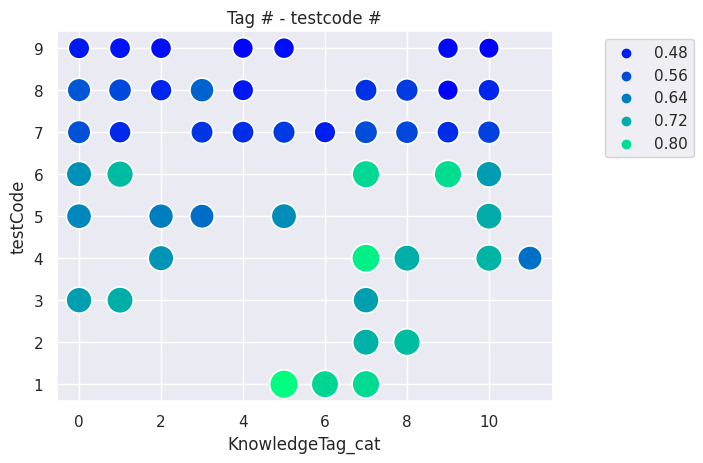

In [46]:
#tag와 test코드 대분류에 따른 정답률 그래프

g = sns.scatterplot(
    data=tag_lv_groupby,
    x='KnowledgeTag_cat',
    y='testCode',
    s = point_size,
    hue = tag_lv_groupby,
    palette = 'winter',
    legend = 'brief'
)
ax = plt.gca()
ax.set_title('Tag # - testcode #')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

### 5. 학생별로 푼 문제의 testCode를 체크  
-> 어떤 학생을 뽑아서 확인할까  
1. 푼 문제의 수가 많은 학생, 중간인 학생
2. 정답률이 높은 학생

In [47]:
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby

,assessmentItemID,answerCode
userID,,
0,745,0.630872
1,933,0.853162
2,276,0.612319
5,833,0.795918
6,921,0.442997
...,...,...
7436,15,0.466667
7437,16,0.375000
7438,16,0.750000


In [48]:
samples = stu_groupby.sort_values(by='assessmentItemID', ascending=False).index[[0, 3300]]
samples

Index([730, 4636], dtype='int16', name='userID')

In [49]:
sample_df = df[df['userID'] == 730]
sample_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testCode,bigtestCode,KnowledgeTag_cat
520750,730,A040007001,A040000007,1,2020-02-04 08:32:53,7271,4,1,7
520751,730,A040007002,A040000007,1,2020-02-04 08:33:07,7271,4,1,7
520752,730,A040007003,A040000007,1,2020-02-04 08:33:20,7271,4,1,7
520753,730,A040007004,A040000007,1,2020-02-04 08:34:00,7271,4,1,7
520754,730,A040007005,A040000007,1,2020-02-04 08:34:14,7271,4,1,7
...,...,...,...,...,...,...,...,...,...
522605,730,A070158003,A070000158,0,2020-12-28 06:54:55,9797,7,2,9
522606,730,A070158004,A070000158,0,2020-12-28 06:54:58,9797,7,2,9
522607,730,A070158006,A070000158,0,2020-12-28 06:55:00,9797,7,2,9
522608,730,A070158008,A070000158,0,2020-12-28 06:55:02,9797,7,2,9


In [50]:
lv_sample = sample_df.groupby('testCode').agg({'assessmentItemID' : 'count', 'answerCode' : percentile})

lv_sample

,assessmentItemID,answerCode
testCode,,
4,325,0.483077
5,294,0.829932
7,1241,0.573731


In [51]:
sample_d2 = df[df['userID'] == 4636]
lv_sample2 = sample_d2.groupby('testCode').agg({'assessmentItemID' : 'count', 'answerCode' : percentile})

lv_sample2

,assessmentItemID,answerCode
testCode,,
1,10,0.900000
5,5,0.400000
6,222,0.518018


In [52]:
samples2 = stu_groupby.sort_values(by='answerCode', ascending=False).index[[0, 3300]]
samples2

Index([6988, 243], dtype='int16', name='userID')

In [53]:
sample2_df = df[df['userID'] == 6988]
sample2_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testCode,bigtestCode,KnowledgeTag_cat
2257763,6988,A080002001,A080000002,1,2020-01-20 06:00:04,4605,8,2,4
2257764,6988,A080002002,A080000002,1,2020-01-20 06:00:06,1394,8,2,1
2257765,6988,A080002003,A080000002,1,2020-01-20 06:00:10,1396,8,2,1
2257766,6988,A080002004,A080000002,1,2020-01-20 06:00:18,1397,8,2,1
2257767,6988,A080002005,A080000002,1,2020-01-20 06:00:23,1396,8,2,1
2257768,6988,A080002006,A080000002,1,2020-01-20 06:00:26,1395,8,2,1
2257769,6988,A050181001,A050000181,1,2020-08-27 02:43:14,10397,5,1,10
2257770,6988,A050181002,A050000181,1,2020-08-27 02:46:48,10397,5,1,10
2257771,6988,A050181003,A050000181,1,2020-08-27 02:49:49,10397,5,1,10
2257772,6988,A050181004,A050000181,1,2020-08-27 02:52:22,10397,5,1,10


제기했던 가설 : testCode가 학년에 따른 분류를 나타낼까?  
다양한 코드를 순서 상관없이 푸는 것으로 보아 학년에 의한 분류는 아닌 것으로 보여진다.